# Plots with confidence interval

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import json
import numpy as np
from scipy.stats import t as student_variable

parameters = json.load(open("parameters.json"))

max_bellman_iterations = 5
max_bellman_iterations_validation = max_bellman_iterations + 20
n_seeds = 10
n_states = parameters["n_states"]
n_actions = parameters["n_actions"]
n_weights = parameters["n_weights"]
n_repetitions = parameters["n_repetitions"]

## Compute confidence intervals

In [2]:
def single_confidence_interval(mean, std, n_samples, confidence_level):
    t_crit = np.abs(student_variable.ppf((1 - confidence_level) / 2, n_samples - 1))
    lower_bound = mean - t_crit * (std / np.sqrt(n_samples))
    upper_bound = mean + t_crit * (std / np.sqrt(n_samples))

    return lower_bound, upper_bound

def confidence_interval(means, stds, n_samples, confidence_level=0.95):
    confidence_intervals = np.zeros((2, len(means)))

    for idx_iteration in range(len(means)):
        confidence_intervals[0, idx_iteration], confidence_intervals[1, idx_iteration] = single_confidence_interval(means[idx_iteration], stds[idx_iteration], n_samples, confidence_level)

    return confidence_intervals

## General case

### Extract data

In [3]:
fqi_q = np.zeros((n_seeds, max_bellman_iterations + 1, n_states, n_actions))
fqi_bi = np.zeros((n_seeds, max_bellman_iterations + 1, n_states, n_actions))
fqi_v = np.zeros((n_seeds, max_bellman_iterations + 1, n_states))

for idx_seed, seed in enumerate(range(1, n_seeds + 1)):
    fqi_q[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_Q_{seed}.npy")
    fqi_bi[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_BI_{seed}.npy")
    fqi_v[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_V_{seed}.npy")

lspi_q = np.load(f"figures/data/LSPI/{max_bellman_iterations}_Q.npy")
lspi_bi = np.load(f"figures/data/LSPI/{max_bellman_iterations}_BI.npy")
lspi_v = np.load(f"figures/data/LSPI/{max_bellman_iterations}_V.npy")

optimal_q = np.load(f"figures/data/optimal/Q.npy")
optimal_v = np.load(f"figures/data/optimal/V.npy")

pbo_linear_q = np.zeros((n_seeds, max_bellman_iterations_validation + 2, n_states, n_actions))
pbo_linear_bi = np.zeros((n_seeds, max_bellman_iterations_validation + 2, n_states, n_actions))
pbo_linear_v = np.zeros((n_seeds, max_bellman_iterations_validation + 2, n_states))

for idx_seed, seed in enumerate(range(1, n_seeds + 1)):
    pbo_linear_q[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_Q_{n_weights}_{seed}.npy")
    pbo_linear_bi[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_BI_{n_weights}_{seed}.npy")
    pbo_linear_v[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_V_{n_weights}_{seed}.npy")

pbo_max_linear_q = np.zeros((n_seeds, max_bellman_iterations_validation + 1, n_states, n_actions))
pbo_max_linear_bi = np.zeros((n_seeds, max_bellman_iterations_validation + 1, n_states, n_actions))
pbo_max_linear_v = np.zeros((n_seeds, max_bellman_iterations_validation + 1, n_states))

for idx_seed, seed in enumerate(range(1, n_seeds + 1)):
    pbo_max_linear_q[idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_Q_{n_repetitions}_{seed}.npy")
    pbo_max_linear_bi[idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_BI_{n_repetitions}_{seed}.npy")
    pbo_max_linear_v[idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_V_{n_repetitions}_{seed}.npy")

pbo_optimal_q = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_Q.npy")
pbo_optimal_bi = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_BI.npy")
pbo_optimal_v = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_V.npy")

### Distances with the optimal Q function

In [4]:
fqi_q_mean = np.sqrt(np.mean(np.square(fqi_q - optimal_q), axis=(2, 3))).mean(axis=0)
fqi_q_std = np.sqrt(np.mean(np.square(fqi_q - optimal_q), axis=(2, 3))).std(axis=0)
fqi_q_confidence_interval = confidence_interval(fqi_q_mean, fqi_q_std, n_seeds)

lspi_q_mean = np.sqrt(np.mean(np.square(lspi_q - optimal_q), axis=(1, 2)))

pbo_linear_q_mean = np.sqrt(np.mean(np.square(pbo_linear_q - optimal_q), axis=(2, 3))).mean(axis=0)
pbo_linear_q_std = np.sqrt(np.mean(np.square(pbo_linear_q - optimal_q), axis=(2, 3))).std(axis=0)
pbo_linear_q_confidence_interval = confidence_interval(pbo_linear_q_mean, pbo_linear_q_std, n_seeds)

pbo_max_linear_q_mean = np.sqrt(np.mean(np.square(pbo_max_linear_q - optimal_q), axis=(2, 3))).mean(axis=0)
pbo_max_linear_q_std = np.sqrt(np.mean(np.square(pbo_max_linear_q - optimal_q), axis=(2, 3))).std(axis=0)
pbo_max_linear_q_confidence_interval = confidence_interval(pbo_max_linear_q_mean, pbo_max_linear_q_std, n_seeds)

pbo_optimal_q_mean = np.sqrt(np.mean(np.square(pbo_optimal_q - optimal_q), axis=(1, 2)))

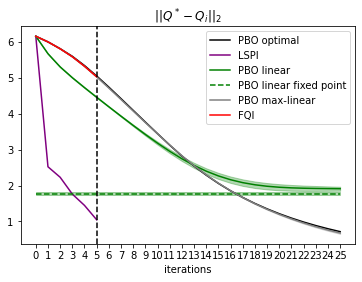

In [5]:
import matplotlib.pyplot as plt 

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_q_mean, label="PBO optimal", color="black")

plt.plot(iterations, lspi_q_mean, label="LSPI", color="purple")

plt.plot(iterations_validation, pbo_linear_q_mean[:-1], label="PBO linear", color="green")
plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, :-1], pbo_linear_q_confidence_interval[1, :-1], color="green", alpha=0.3)

plt.hlines(pbo_linear_q_mean[-1], 0, max_bellman_iterations_validation, color="green", linestyle="--", label="PBO linear fixed point")
plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, -1], pbo_linear_q_confidence_interval[1, -1], color="green", alpha=0.3)

plt.plot(iterations_validation, pbo_max_linear_q_mean, label="PBO max-linear", color="grey")
plt.fill_between(iterations_validation, pbo_max_linear_q_confidence_interval[0], pbo_max_linear_q_confidence_interval[1], color="grey", alpha=0.3)

plt.plot(iterations, fqi_q_mean, label="FQI", color="red")
plt.fill_between(iterations, fqi_q_confidence_interval[0], fqi_q_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$|| Q^* - Q_i ||_2$")
plt.legend()
_ = plt.savefig(f"figures/distance_to_optimal_Q_{max_bellman_iterations}.jpg", bbox_inches='tight')

### Distances with the optimal V function

In [6]:
fqi_v_mean = np.sqrt(np.mean(np.square(fqi_v - optimal_v), axis=2)).mean(axis=0)
fqi_v_std = np.sqrt(np.mean(np.square(fqi_v - optimal_v), axis=2)).std(axis=0)
fqi_v_confidence_interval = confidence_interval(fqi_v_mean, fqi_v_std, n_seeds)

lspi_v_mean = np.sqrt(np.mean(np.square(lspi_v - optimal_v), axis=1))

pbo_linear_v_mean = np.sqrt(np.mean(np.square(pbo_linear_v - optimal_v), axis=2)).mean(axis=0)
pbo_linear_v_std = np.sqrt(np.mean(np.square(pbo_linear_v - optimal_v), axis=2)).std(axis=0)
pbo_linear_v_confidence_interval = confidence_interval(pbo_linear_v_mean, pbo_linear_v_std, n_seeds)

pbo_max_linear_v_mean = np.sqrt(np.mean(np.square(pbo_max_linear_v - optimal_v), axis=2)).mean(axis=0)
pbo_max_linear_v_std = np.sqrt(np.mean(np.square(pbo_max_linear_v - optimal_v), axis=2)).std(axis=0)
pbo_max_linear_v_confidence_interval = confidence_interval(pbo_max_linear_v_mean, pbo_max_linear_v_std, n_seeds)

pbo_optimal_v_mean = np.sqrt(np.mean(np.square(pbo_optimal_v - optimal_v), axis=1))

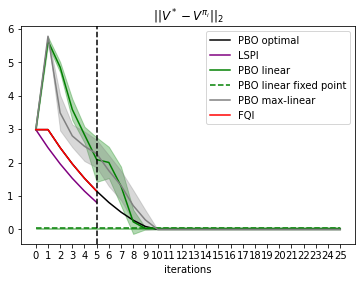

In [7]:
import matplotlib.pyplot as plt 

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_v_mean, label="PBO optimal", color="black")

plt.plot(iterations, lspi_v_mean, label="LSPI", color="purple")

plt.plot(iterations_validation, pbo_linear_v_mean[:-1], label="PBO linear", color="green")
plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, :-1], pbo_linear_v_confidence_interval[1, :-1], color="green", alpha=0.3)

plt.hlines(pbo_linear_v_mean[-1], 0, max_bellman_iterations_validation, color="green", linestyle="--", label="PBO linear fixed point")
plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, -1], pbo_linear_v_confidence_interval[1, -1], color="green", alpha=0.3)

plt.plot(iterations_validation, pbo_max_linear_v_mean, label="PBO max-linear", color="grey")
plt.fill_between(iterations_validation, pbo_max_linear_v_confidence_interval[0], pbo_max_linear_v_confidence_interval[1], color="grey", alpha=0.3)

plt.plot(iterations, fqi_v_mean, label="FQI", color="red")
plt.fill_between(iterations, fqi_v_confidence_interval[0], fqi_v_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$ || V^* - V^{\pi_i} ||_2 $")
plt.legend()
_ = plt.savefig(f"figures/distance_to_optimal_V_{max_bellman_iterations}.jpg", bbox_inches='tight')

### Distance to the optimal Bellman iteration

In [8]:
fqi_bi_mean = np.sqrt(np.mean(np.square(fqi_bi[:, :-1] - fqi_q[:, 1:]), axis=(2, 3))).mean(axis=0)
fqi_bi_std = np.sqrt(np.mean(np.square(fqi_bi[:, :-1] - fqi_q[:, 1:]), axis=(2, 3))).std(axis=0)
fqi_bi_confidence_interval = confidence_interval(fqi_bi_mean, fqi_bi_std, n_seeds)

lspi_bi_mean = np.sqrt(np.mean(np.square(lspi_bi[:-1] - lspi_q[1:]), axis=(1, 2)))

pbo_linear_bi_mean = np.sqrt(np.mean(np.square(pbo_linear_bi[:, :-2] - pbo_linear_q[:, 1:-1]), axis=(2, 3))).mean(axis=0)
pbo_linear_bi_std = np.sqrt(np.mean(np.square(pbo_linear_bi[:, :-2] - pbo_linear_q[:, 1:-1]), axis=(2, 3))).std(axis=0)
pbo_linear_bi_confidence_interval = confidence_interval(pbo_linear_bi_mean, pbo_linear_bi_std, n_seeds)

pbo_linear_bi_fixed_point_mean = np.sqrt(np.mean(np.square(pbo_linear_bi[:, -1] - pbo_linear_q[:, -1]), axis=(1, 2))).mean(axis=0)
pbo_linear_bi_fixed_point_std = np.sqrt(np.mean(np.square(pbo_linear_bi[:, -1] - pbo_linear_q[:, -1]), axis=(1, 2))).std(axis=0)
pbo_linear_bi_fixed_point_confidence_interval = confidence_interval([pbo_linear_bi_fixed_point_mean], [pbo_linear_bi_fixed_point_std], n_seeds)

pbo_max_linear_bi_mean = np.sqrt(np.mean(np.square(pbo_max_linear_bi[:, :-1] - pbo_max_linear_q[:, 1:]), axis=(2, 3))).mean(axis=0)
pbo_max_linear_bi_std = np.sqrt(np.mean(np.square(pbo_max_linear_bi[:, :-1] - pbo_max_linear_q[:, 1:]), axis=(2, 3))).std(axis=0)
pbo_max_linear_bi_confidence_interval = confidence_interval(pbo_max_linear_bi_mean, pbo_max_linear_bi_std, n_seeds)

pbo_optimal_bi_mean = np.sqrt(np.mean(np.square(pbo_optimal_bi[:-1] - pbo_optimal_q[1:]), axis=(1, 2)))

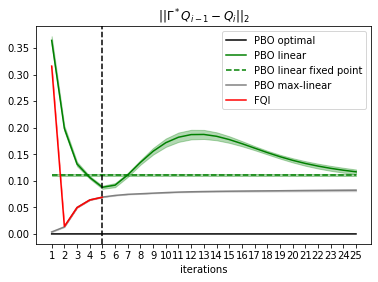

In [9]:
import matplotlib.pyplot as plt 

iterations = range(1, max_bellman_iterations + 1)
iterations_validation = range(1, max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_bi_mean, label="PBO optimal", color="black")

# plt.plot(iterations, lspi_bi_mean, label="LSPI", color="purple")

plt.plot(iterations_validation, pbo_linear_bi_mean, label="PBO linear", color="green")
plt.fill_between(iterations_validation, pbo_linear_bi_confidence_interval[0], pbo_linear_bi_confidence_interval[1], color="green", alpha=0.3)

plt.hlines(pbo_linear_bi_fixed_point_mean, 1, max_bellman_iterations_validation, color="green", linestyle="--", label="PBO linear fixed point")
plt.fill_between(iterations_validation, pbo_linear_bi_fixed_point_confidence_interval[0], pbo_linear_bi_fixed_point_confidence_interval[1], color="green", alpha=0.3)

plt.plot(iterations_validation, pbo_max_linear_bi_mean, label="PBO max-linear", color="grey")
plt.fill_between(iterations_validation, pbo_max_linear_bi_confidence_interval[0], pbo_max_linear_bi_confidence_interval[1], color="grey", alpha=0.3)

plt.plot(iterations, fqi_bi_mean, label="FQI", color="red")
plt.fill_between(iterations, fqi_bi_confidence_interval[0], fqi_bi_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$|| \Gamma^*Q_{i-1} - Q_i ||_2$")
plt.legend()
_ = plt.savefig(f"figures/distance_to_optimal_Bellman_iteration_{max_bellman_iterations}.jpg", bbox_inches='tight')

## Investigation on the number of weights

In [10]:
n_weights_list = [1, 10, 100]
n_weights_colors = ["orange", "blue", "green"]

### Extract data

In [11]:
pbo_linear_q_n_weights = np.zeros((len(n_weights_list), n_seeds, max_bellman_iterations_validation + 2, n_states, n_actions))
pbo_linear_bi_n_weights = np.zeros((len(n_weights_list), n_seeds, max_bellman_iterations_validation + 2, n_states, n_actions))
pbo_linear_v_n_weights = np.zeros((len(n_weights_list), n_seeds, max_bellman_iterations_validation + 2, n_states))

for idx_n_weights, n_weights_ in enumerate(n_weights_list):
    for idx_seed, seed in enumerate(range(1, n_seeds + 1)):
        pbo_linear_q_n_weights[idx_n_weights, idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_Q_{n_weights_}_{seed}.npy")
        pbo_linear_bi_n_weights[idx_n_weights, idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_BI_{n_weights_}_{seed}.npy")
        pbo_linear_v_n_weights[idx_n_weights, idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_V_{n_weights_}_{seed}.npy")

### Distance to the optimal Q functions

In [12]:
pbo_linear_q_mean_n_weights = np.zeros((len(n_weights_list), max_bellman_iterations_validation + 2))
pbo_linear_q_confidence_interval_n_weights = np.zeros((len(n_weights_list), 2, max_bellman_iterations_validation + 2))

for idx_n_weights, n_weights_ in enumerate(n_weights_list):
    pbo_linear_q_mean_n_weights[idx_n_weights] = np.sqrt(np.mean(np.square(pbo_linear_q_n_weights[idx_n_weights] - optimal_q), axis=(2, 3))).mean(axis=0)
    pbo_linear_q_std_n_weights = np.sqrt(np.mean(np.square(pbo_linear_q_n_weights[idx_n_weights] - optimal_q), axis=(2, 3))).std(axis=0)
    pbo_linear_q_confidence_interval_n_weights[idx_n_weights] = confidence_interval(pbo_linear_q_mean_n_weights[idx_n_weights], pbo_linear_q_std_n_weights, n_seeds)

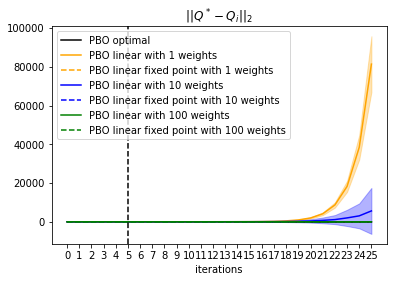

In [13]:
import matplotlib.pyplot as plt 

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_q_mean, label="PBO optimal", color="black")

for idx_n_weights, n_weights_ in enumerate(n_weights_list):
    plt.plot(iterations_validation, pbo_linear_q_mean_n_weights[idx_n_weights, :-1], label=f"PBO linear with {n_weights_} weights", color=n_weights_colors[idx_n_weights])
    plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval_n_weights[idx_n_weights, 0, :-1], pbo_linear_q_confidence_interval_n_weights[idx_n_weights, 1, :-1], color=n_weights_colors[idx_n_weights], alpha=0.3)

    plt.hlines(pbo_linear_q_mean_n_weights[idx_n_weights, -1], 0, max_bellman_iterations_validation, color=n_weights_colors[idx_n_weights], linestyle="--", label=f"PBO linear fixed point with {n_weights_} weights")
    plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval_n_weights[idx_n_weights, 0, -1], pbo_linear_q_confidence_interval_n_weights[idx_n_weights, 1, -1], color=n_weights_colors[idx_n_weights], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$|| Q^* - Q_i ||_2$")
plt.legend()
_ = plt.savefig(f"figures/n_weights_distance_to_optimal_Q_{max_bellman_iterations}.jpg", bbox_inches='tight')

### Distances with the optimal V function

In [14]:
pbo_linear_v_mean_n_weights = np.zeros((len(n_weights_list), max_bellman_iterations_validation + 2))
pbo_linear_v_confidence_interval_n_weights = np.zeros((len(n_weights_list), 2, max_bellman_iterations_validation + 2))

for idx_n_weights, n_weights_ in enumerate(n_weights_list):
    pbo_linear_v_mean_n_weights[idx_n_weights] = np.sqrt(np.mean(np.square(pbo_linear_v_n_weights[idx_n_weights] - optimal_v), axis=2)).mean(axis=0)
    pbo_linear_v_std_n_weights = np.sqrt(np.mean(np.square(pbo_linear_v_n_weights[idx_n_weights] - optimal_v), axis=2)).std(axis=0)
    pbo_linear_v_confidence_interval_n_weights[idx_n_weights] = confidence_interval(pbo_linear_v_mean_n_weights[idx_n_weights], pbo_linear_v_std_n_weights, n_seeds)

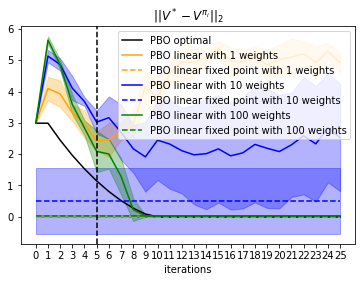

In [15]:
import matplotlib.pyplot as plt 

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_v_mean, label="PBO optimal", color="black")

for idx_n_weights, n_weights_ in enumerate(n_weights_list):
    plt.plot(iterations_validation, pbo_linear_v_mean_n_weights[idx_n_weights, :-1], label=f"PBO linear with {n_weights_} weights", color=n_weights_colors[idx_n_weights])
    plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval_n_weights[idx_n_weights, 0, :-1], pbo_linear_v_confidence_interval_n_weights[idx_n_weights, 1, :-1], color=n_weights_colors[idx_n_weights], alpha=0.3)

    plt.hlines(pbo_linear_v_mean_n_weights[idx_n_weights, -1], 0, max_bellman_iterations_validation, color=n_weights_colors[idx_n_weights], linestyle="--", label=f"PBO linear fixed point with {n_weights_} weights")
    plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval_n_weights[idx_n_weights, 0, -1], pbo_linear_v_confidence_interval_n_weights[idx_n_weights, 1, -1], color=n_weights_colors[idx_n_weights], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$ || V^* - V^{\pi_i} ||_2 $")
plt.legend()
_ = plt.savefig(f"figures/n_weights_distance_to_optimal_V_{max_bellman_iterations}.jpg", bbox_inches='tight')

### Distance to the optimal Bellman iteration

In [16]:
pbo_linear_bi_mean_n_weights = np.zeros((len(n_weights_list), max_bellman_iterations_validation))
pbo_linear_bi_confidence_interval_n_weights = np.zeros((len(n_weights_list), 2, max_bellman_iterations_validation))

pbo_linear_bi_fixed_point_mean_n_weights = np.zeros(len(n_weights_list))
pbo_linear_bi_fixed_point_confidence_interval_n_weights = np.zeros((len(n_weights_list), 2, 1))

for idx_n_weights, n_weights_ in enumerate(n_weights_list):
    pbo_linear_bi_mean_n_weights[idx_n_weights] = np.sqrt(np.mean(np.square(pbo_linear_bi_n_weights[idx_n_weights, :, :-2] - pbo_linear_q_n_weights[idx_n_weights, :, 1:-1]), axis=(2, 3))).mean(axis=0)
    pbo_linear_bi_std_n_weights = np.sqrt(np.mean(np.square(pbo_linear_bi_n_weights[idx_n_weights, :, :-2] - pbo_linear_q_n_weights[idx_n_weights, :, 1:-1]), axis=(2, 3))).std(axis=0)
    pbo_linear_bi_confidence_interval_n_weights[idx_n_weights] = confidence_interval(pbo_linear_bi_mean_n_weights[idx_n_weights], pbo_linear_bi_std_n_weights, n_seeds)

    pbo_linear_bi_fixed_point_mean_n_weights[idx_n_weights] = np.sqrt(np.mean(np.square(pbo_linear_bi_n_weights[idx_n_weights, :, -1] - pbo_linear_q_n_weights[idx_n_weights, :, -1]), axis=(1, 2))).mean(axis=0)
    pbo_linear_bi_fixed_point_std_n_weights = np.sqrt(np.mean(np.square(pbo_linear_bi_n_weights[idx_n_weights, :, -1] - pbo_linear_q_n_weights[idx_n_weights, :, -1]), axis=(1, 2))).std(axis=0)
    pbo_linear_bi_fixed_point_confidence_interval_n_weights[idx_n_weights] = confidence_interval([pbo_linear_bi_fixed_point_mean_n_weights[idx_n_weights]], [pbo_linear_bi_fixed_point_std_n_weights], n_seeds)

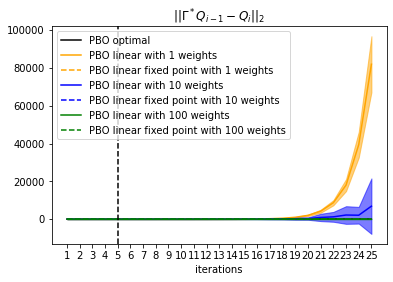

In [17]:
import matplotlib.pyplot as plt 

iterations = range(1, max_bellman_iterations + 1)
iterations_validation = range(1, max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_bi_mean, label="PBO optimal", color="black")

for idx_n_weights, n_weights_ in enumerate(n_weights_list):
    plt.plot(iterations_validation, pbo_linear_bi_mean_n_weights[idx_n_weights], label=f"PBO linear with {n_weights_} weights", color=n_weights_colors[idx_n_weights])
    plt.fill_between(iterations_validation, pbo_linear_bi_confidence_interval_n_weights[idx_n_weights, 0], pbo_linear_bi_confidence_interval_n_weights[idx_n_weights, 1], color=n_weights_colors[idx_n_weights], alpha=0.3)

    plt.hlines(pbo_linear_bi_fixed_point_mean_n_weights[idx_n_weights], 1, max_bellman_iterations_validation, color=n_weights_colors[idx_n_weights], linestyle="--", label=f"PBO linear fixed point with {n_weights_} weights")
    plt.fill_between(iterations_validation, pbo_linear_bi_confidence_interval_n_weights[idx_n_weights, 0], pbo_linear_bi_confidence_interval_n_weights[idx_n_weights, 1], color=n_weights_colors[idx_n_weights], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$|| \Gamma^*Q_{i-1} - Q_i ||_2$")
plt.legend()
_ = plt.savefig(f"figures/n_weights_distance_to_optimal_BI_{max_bellman_iterations}.jpg", bbox_inches='tight')

## Investigation on the number of repetitions

In [18]:
n_repetitions_list = [2, 5, 10]
n_repetitions_colors = ["orange", "blue", "grey"]

### Extract data

In [19]:
pbo_max_linear_q_n_repetitions = np.zeros((len(n_repetitions_list), n_seeds, max_bellman_iterations_validation + 1, n_states, n_actions))
pbo_max_linear_bi_n_repetitions = np.zeros((len(n_repetitions_list), n_seeds, max_bellman_iterations_validation + 1, n_states, n_actions))
pbo_max_linear_v_n_repetitions = np.zeros((len(n_repetitions_list), n_seeds, max_bellman_iterations_validation + 1, n_states))

for idx_n_repetitions, n_repetitions_ in enumerate(n_repetitions_list):
    for idx_seed, seed in enumerate(range(1, n_seeds + 1)):
        pbo_max_linear_q_n_repetitions[idx_n_repetitions, idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_Q_{n_repetitions_}_{seed}.npy")
        pbo_max_linear_bi_n_repetitions[idx_n_repetitions, idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_BI_{n_repetitions_}_{seed}.npy")
        pbo_max_linear_v_n_repetitions[idx_n_repetitions, idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_V_{n_repetitions}_{seed}.npy")

### Distance to the optimal Q functions

In [20]:
pbo_max_linear_q_mean_n_repetitions = np.zeros((len(n_repetitions_list), max_bellman_iterations_validation + 1))
pbo_max_linear_q_confidence_interval_n_repetitions = np.zeros((len(n_repetitions_list), 2, max_bellman_iterations_validation + 1))

for idx_n_repetitions, n_repetitions_ in enumerate(n_repetitions_list):
    pbo_max_linear_q_mean_n_repetitions[idx_n_repetitions] = np.sqrt(np.mean(np.square(pbo_max_linear_q_n_repetitions[idx_n_repetitions] - optimal_q), axis=(2, 3))).mean(axis=0)
    pbo_max_linear_q_std_n_repetitions = np.sqrt(np.mean(np.square(pbo_max_linear_q_n_repetitions[idx_n_repetitions] - optimal_q), axis=(2, 3))).std(axis=0)
    pbo_max_linear_q_confidence_interval_n_repetitions[idx_n_repetitions] = confidence_interval(pbo_max_linear_q_mean_n_repetitions[idx_n_repetitions], pbo_max_linear_q_std_n_repetitions, n_seeds)

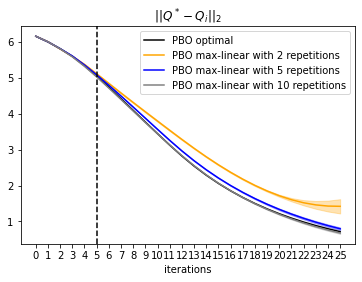

In [21]:
import matplotlib.pyplot as plt 

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_q_mean, label="PBO optimal", color="black")

for idx_n_repetitions, n_repetitions_ in enumerate(n_repetitions_list):
    plt.plot(iterations_validation, pbo_max_linear_q_mean_n_repetitions[idx_n_repetitions], label=f"PBO max-linear with {n_repetitions_} repetitions", color=n_repetitions_colors[idx_n_repetitions])
    plt.fill_between(iterations_validation, pbo_max_linear_q_confidence_interval_n_repetitions[idx_n_repetitions, 0], pbo_max_linear_q_confidence_interval_n_repetitions[idx_n_repetitions, 1], color=n_repetitions_colors[idx_n_repetitions], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$|| Q^* - Q_i ||_2$")
plt.legend()
_ = plt.savefig(f"figures/n_repetitions_distance_to_optimal_Q_{max_bellman_iterations}.jpg", bbox_inches='tight')

### Distances with the optimal V function

In [22]:
pbo_max_linear_v_mean_n_repetitions = np.zeros((len(n_repetitions_list), max_bellman_iterations_validation + 1))
pbo_max_linear_v_confidence_interval_n_repetitions = np.zeros((len(n_repetitions_list), 2, max_bellman_iterations_validation + 1))

for idx_n_repetitions, n_repetitions_ in enumerate(n_repetitions_list):
    pbo_max_linear_v_mean_n_repetitions[idx_n_repetitions] = np.sqrt(np.mean(np.square(pbo_max_linear_v_n_repetitions[idx_n_repetitions] - optimal_v), axis=2)).mean(axis=0)
    pbo_max_linear_v_std_n_repetitions = np.sqrt(np.mean(np.square(pbo_max_linear_v_n_repetitions[idx_n_repetitions] - optimal_v), axis=2)).std(axis=0)
    pbo_max_linear_v_confidence_interval_n_repetitions[idx_n_repetitions] = confidence_interval(pbo_max_linear_v_mean_n_repetitions[idx_n_repetitions], pbo_max_linear_v_std_n_repetitions, n_seeds)

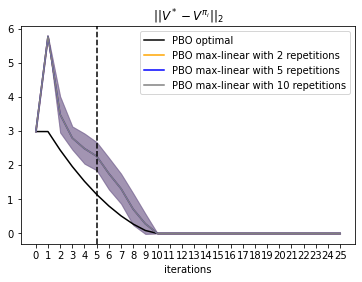

In [23]:
import matplotlib.pyplot as plt 

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_v_mean, label="PBO optimal", color="black")

for idx_n_repetitions, n_repetitions_ in enumerate(n_repetitions_list):
    plt.plot(iterations_validation, pbo_max_linear_v_mean_n_repetitions[idx_n_repetitions], label=f"PBO max-linear with {n_repetitions_} repetitions", color=n_repetitions_colors[idx_n_repetitions])
    plt.fill_between(iterations_validation, pbo_max_linear_v_confidence_interval_n_repetitions[idx_n_repetitions, 0], pbo_max_linear_v_confidence_interval_n_repetitions[idx_n_repetitions, 1], color=n_repetitions_colors[idx_n_repetitions], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$ || V^* - V^{\pi_i} ||_2 $")
plt.legend()
_ = plt.savefig(f"figures/n_repetitions_distance_to_optimal_V_{max_bellman_iterations}.jpg", bbox_inches='tight')

### Distance to the optimal Bellman iteration

In [24]:
pbo_max_linear_bi_mean_n_repetitions = np.zeros((len(n_repetitions_list), max_bellman_iterations_validation))
pbo_max_linear_bi_confidence_interval_n_repetitions = np.zeros((len(n_repetitions_list), 2, max_bellman_iterations_validation))

for idx_n_repetitions, n_repetitions_ in enumerate(n_repetitions_list):
    pbo_max_linear_bi_mean_n_repetitions[idx_n_repetitions] = np.sqrt(np.mean(np.square(pbo_max_linear_bi_n_repetitions[idx_n_weights, :, :-1] - pbo_max_linear_q_n_repetitions[idx_n_repetitions, :, 1:]), axis=(2, 3))).mean(axis=0)
    pbo_max_linear_bi_std_n_repetitions = np.sqrt(np.mean(np.square(pbo_max_linear_bi_n_repetitions[idx_n_repetitions, :, :-1] - pbo_max_linear_q_n_repetitions[idx_n_repetitions, :, 1:]), axis=(2, 3))).std(axis=0)
    pbo_max_linear_bi_confidence_interval_n_repetitions[idx_n_repetitions] = confidence_interval(pbo_max_linear_bi_mean_n_repetitions[idx_n_repetitions], pbo_max_linear_bi_std_n_repetitions, n_seeds)

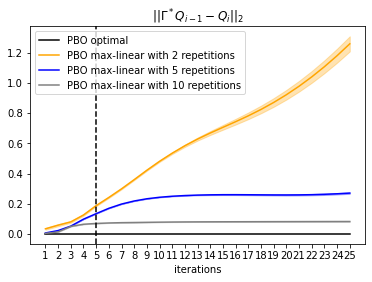

In [25]:
import matplotlib.pyplot as plt 

iterations = range(1, max_bellman_iterations + 1)
iterations_validation = range(1, max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_bi_mean, label="PBO optimal", color="black")

for idx_n_repetitions, n_repetitions_ in enumerate(n_repetitions_list):
    plt.plot(iterations_validation, pbo_max_linear_bi_mean_n_repetitions[idx_n_repetitions], label=f"PBO max-linear with {n_repetitions_} repetitions", color=n_repetitions_colors[idx_n_repetitions])
    plt.fill_between(iterations_validation, pbo_max_linear_bi_confidence_interval_n_repetitions[idx_n_repetitions, 0], pbo_max_linear_bi_confidence_interval_n_repetitions[idx_n_repetitions, 1], color=n_repetitions_colors[idx_n_repetitions], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(iterations_validation)
plt.xlabel("iterations")

plt.title(r"$|| \Gamma^*Q_{i-1} - Q_i ||_2$")
plt.legend()
_ = plt.savefig(f"figures/n_repetitions_distance_to_optimal_BI_{max_bellman_iterations}.jpg", bbox_inches='tight')